<a href="https://colab.research.google.com/github/quicksilverri/machile-learning-notes/blob/main/sklearn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# %pip install --upgrade scikit-learn==0.23.1

In [37]:
from sklearn.datasets import load_boston 
import pandas as pd

In [38]:
X, y = load_boston(return_X_y=True)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [40]:
kn_m = KNeighborsRegressor()

In [41]:
lr_m = LinearRegression()

In [42]:
kn_m.fit(X, y)

KNeighborsRegressor()

In [43]:
lr_m.fit(X, y)

LinearRegression()

In [44]:
import matplotlib.pylab as plt

In [45]:
pred = kn_m.predict(X)

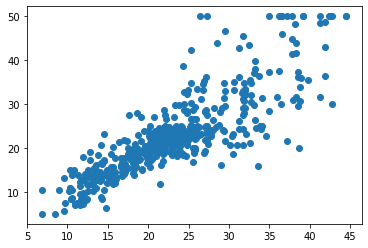

In [46]:
plt.scatter(pred, y)

In [47]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

In [48]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ('scale', StandardScaler()), 
    ('model', KNeighborsRegressor())
])

In [49]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [50]:
pred = pipe.predict(X)

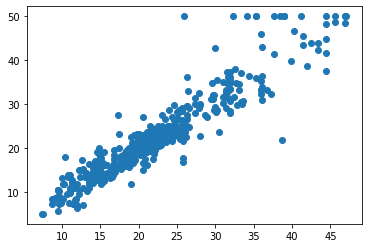

In [51]:
plt.scatter(pred, y)

In [52]:
lr_pipe = Pipeline([
                    ('scale', StandardScaler()), 
                    ('model', LinearRegression())
])

In [53]:
lr_pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [54]:
pred_lr = lr_pipe.predict(X)

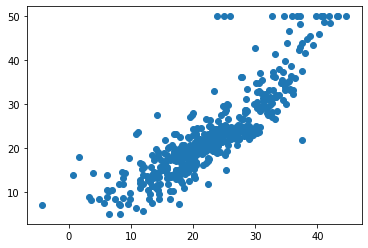

In [55]:
plt.scatter(pred_lr, y)

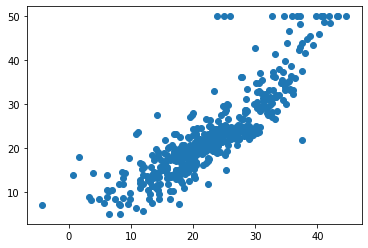

In [56]:
lr = LinearRegression()
lr.fit(X, y)
pred_lr = lr.predict(X)
plt.scatter(pred_lr, y)

scaling doesnt really effects LR

# So this is a nice pattern: 

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
X, y = load_boston(return_X_y=True)

pipe = Pipeline([
                 ('scale', StandardScaler()), 
                 ('model', KNeighborsRegressor())
])

In [59]:
# pipe.get_params()

In [60]:
mod = GridSearchCV(estimator=pipe, 
             param_grid={
                 'model__n_neighbors': range(1, 11)
             }, 
             cv=3)

In [61]:
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': range(1, 11)})

In [62]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002576,0.000935,0.002758,0.000984,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001334,0.000014,0.002002,0.000100,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001359,0.000036,0.002457,0.000652,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001378,0.000041,0.002284,0.000219,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001323,0.000028,0.002195,0.000069,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001808,0.000374,0.003626,0.000279,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001691,0.000281,0.002895,0.000535,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001325,0.000009,0.002357,0.000154,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001316,0.000013,0.002534,0.000296,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001287,0.000040,0.002382,0.000173,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


# Looking at the dataset is CRUCIAL LMAO LOOK AT THE DATA

In [91]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [64]:
std_scaler = StandardScaler()
X_new = std_scaler.fit_transform(X)

In [73]:
X = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [80]:
X_new = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

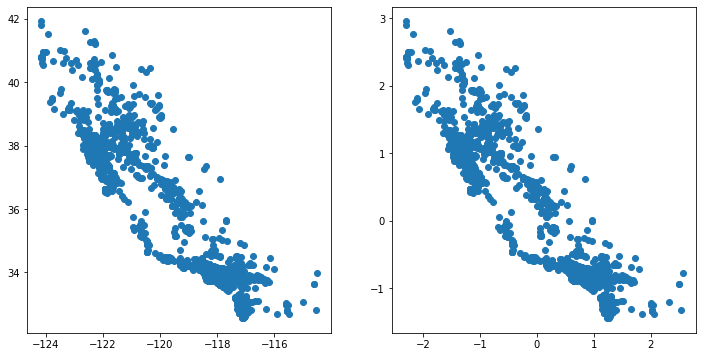

In [90]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].scatter(X.longitude, X.latitude)
axis[1].scatter(X_new.longitude, X_new.latitude)

In [99]:
q_scaler = QuantileTransformer()
X_quant = pd.DataFrame(q_scaler.fit_transform(X), columns=X.columns)

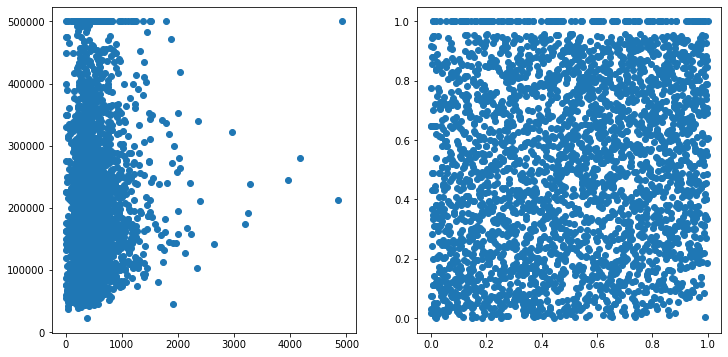

In [100]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].scatter(X.households, X.median_house_value)
axis[1].scatter(X_quant.households, X_quant.median_house_value)

Everything that has something to do with mean and std **is sensetive** to outliers.  
At the same time median and quantiles **does not care** about ouliers. 

In [104]:
import seaborn as sns

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata2.csv')
X = df[['x', 'y']]
y = df['z']

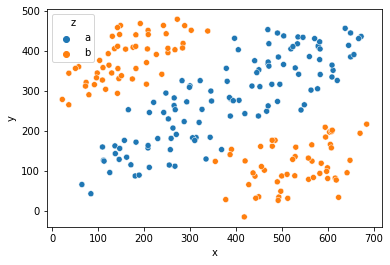

In [109]:
sns.scatterplot(data=df, x='x', y='y', hue='z')

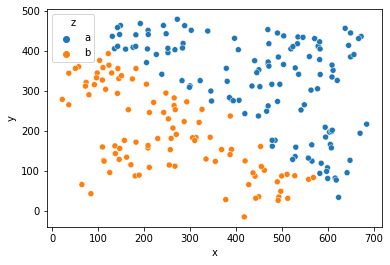

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
                 ('scale', QuantileTransformer(n_quantiles=100)), 
                 ('model', LogisticRegression())
])

pred = pd.DataFrame(pipe.fit(X, y).predict(X), columns=['z'])
sns.scatterplot(x=X.x, y=X.y, hue=pred.z)

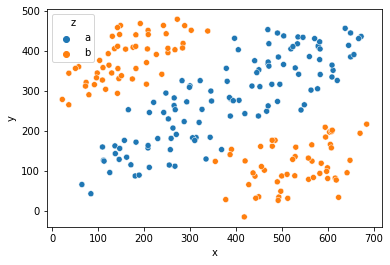

In [129]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
                 ('scale', PolynomialFeatures()), 
                 ('model', LogisticRegression())
])

pred = pd.DataFrame(pipe.fit(X, y).predict(X), columns=['z'])
sns.scatterplot(x=X.x, y=X.y, hue=pred.z)

# How to deal with categorical data

In [130]:
from sklearn.preprocessing import OneHotEncoder

In [133]:
arr = pd.DataFrame(['low', 'low', 'high', 'medium'])

In [137]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

This is what you can pass to sklearn as numeric data 

In [140]:
enc.transform([['lmao'], ['kek']])

array([[0., 0., 0.],
       [0., 0., 0.]])

## Try myself

In [145]:
df = pd.read_csv('/content/data.csv')
X = df[['x', 'y']]
y = df['z']

In [149]:
df

,x,y,z
0,471.072417,420.516180,b
1,390.672568,459.336100,b
2,421.723665,457.596130,b
3,370.943961,454.918368,b
4,366.544656,433.542907,b
...,...,...,...
391,424.756483,177.959952,c
392,377.969532,188.927478,c
393,448.139272,175.421944,c
394,497.743756,118.762023,c


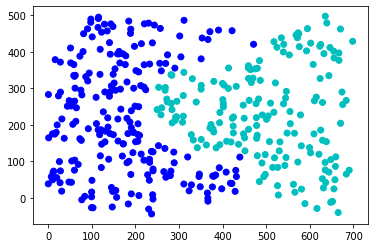

In [157]:
model = LogisticRegression()

model.fit(X, y)

plt.scatter(x=df.x, y=df.y, c=df.z)

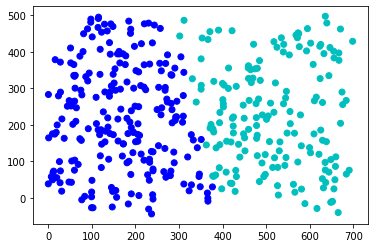

In [158]:
pred = model.predict(X)
plt.scatter(x=X.x, y=X.y, c=pred)

In [165]:
pipe = Pipeline([
                 ('scale', PolynomialFeatures()), 
                 ('model', LogisticRegression())
])
pipe.fit(X, y)
pipe_pred = pipe.predict(X)

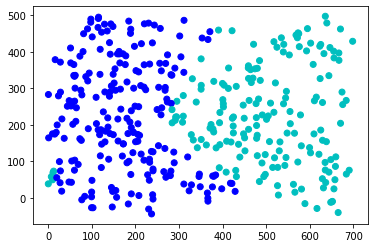

In [166]:
plt.scatter(x=X.x, y=X.y, c=pipe_pred)

# How to choose a good model 

In [192]:
df = pd.read_csv('https://raw.githubusercontent.com/quicksilverri/machile-learning-notes/main/creditcard40000.csv', index_col=0)

In [195]:
X = df.drop(columns=['Time', 'Amount', 'Class'])
y = df['Class']

f'Shapes of X={X.shape}, y={y.shape}, #Fraud casees={y.sum()}'

'Shapes of X=(40000, 28), y=(40000,), #Fraud casees=104.0'

this is very unbalanced dataset because there are WAY more non-fraud cases.

In [196]:
pd.DataFrame(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.051131,0.606656,0.441297,0.590587,-0.118730,1.010767,2.282192,-0.751310,0.141134,0.661042,...,0.483128,-0.276647,-0.168207,0.495169,-0.066540,-0.904026,-0.149187,-0.302797,-0.188726,-0.248812
39996,1.188332,0.360587,-0.024267,1.179898,-0.095200,-0.975171,0.403633,-0.160097,-0.460291,0.294386,...,-0.091671,-0.190804,0.063470,0.115945,-0.129453,0.527456,0.748484,-0.308659,-0.022350,0.003130
39997,1.038810,-2.090833,0.852849,-0.847290,-2.112321,0.291188,-1.321491,0.007713,-0.771225,1.005279,...,0.306326,0.165469,-0.059743,0.138289,-0.341212,-0.045303,0.516037,0.016258,0.051843,0.061811
39998,1.211027,0.614544,-0.459212,0.900736,0.135725,-1.175774,0.337603,-0.198540,-0.188104,-0.756229,...,-0.847260,-0.114746,-0.105254,-0.214124,-0.013156,0.287419,0.453268,0.378507,-0.013994,0.042698


In [201]:
mod = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 3})
mod.fit(X, y)

LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=1000)

In [202]:
mod.predict(X).sum()

112.0

In [208]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000), 
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 10)]}, 
    cv=4, 
    n_jobs=-1
)

grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]})

In [209]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.289528,0.370464,0.006981,0.002146,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.9983,0.9965,0.9978,0.9982,0.997700,0.000718,9
1,1.446985,0.433732,0.012525,0.004981,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.9983,0.9965,0.9985,0.9981,0.997850,0.000792,8
2,1.035699,0.287460,0.005982,0.000300,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.9983,0.9965,0.9992,0.9982,0.998050,0.000976,7
3,1.001979,0.296923,0.006870,0.002117,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.9982,0.9962,0.9995,0.9984,0.998075,0.001190,6
4,0.949749,0.225801,0.006027,0.000213,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.9984,0.9962,0.9995,0.9986,0.998175,0.001213,4
5,1.264083,0.461975,0.007103,0.002257,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.9985,0.9962,0.9995,0.9986,0.998200,0.001219,2
6,1.288274,0.212279,0.006167,0.001404,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.9986,0.9962,0.9995,0.9988,0.998275,0.001244,1
7,0.905736,0.228248,0.006319,0.001350,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.9987,0.9960,0.9993,0.9988,0.998200,0.001290,3
8,0.851847,0.148183,0.005178,0.000850,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.9986,0.9959,0.9993,0.9989,0.998175,0.001337,5


In [210]:
from sklearn.metrics import precision_score, recall_score

In [211]:
precision_score(y, grid.predict(X))

0.7016129032258065

In [212]:
recall_score(y, grid.predict(X))

0.8365384615384616